In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading Data

In [100]:
housing_data=pd.read_csv("US_Data_Cleaned.csv")

In [101]:
housing_data.head()

,Observation_date,Price Index,Employed,New House Supply Rate,Population,Mortgage Rate,Personal Income,GDP,Unemployment Rate,Houseownership Rate,New One Family House,Inflation Rate,Consumer Credit Rate,Floor Area West Census Region
0,01/01/03,128.5,112746,4.0,219897,5.3,9290.1,11174.1,5.8,68.0,341,2.3,6.4,2198
1,01/02/03,129.4,113285,4.5,220114,5.2,9296.2,11174.1,5.9,68.0,341,2.3,6.6,2198
2,01/03/03,130.1,113174,4.1,220317,5.1,9333.8,11174.1,5.9,68.0,338,2.3,4.7,2198
3,01/04/03,130.9,113168,4.1,220540,5.1,9356.4,11312.8,6.0,68.0,340,2.3,7.7,2141
4,01/05/03,131.7,112991,3.9,220768,4.9,9414.4,11312.8,6.1,68.0,343,2.3,8.0,2141


## Preprocessing and Exploring the data
### Exploring the descriptive statistics:

In [102]:
housing_data.describe(include="all")

,Observation_date,Price Index,Employed,New House Supply Rate,Population,Mortgage Rate,Personal Income,GDP,Unemployment Rate,Houseownership Rate,New One Family House,Inflation Rate,Consumer Credit Rate,Floor Area West Census Region
count,240,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
unique,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,01/01/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,180.659583,120274.754167,6.137917,243868.275000,4.069167,14659.602500,17256.650000,6.012083,66.201250,318.233333,2.475000,4.269583,2264.812500
std,NaN,41.257383,6304.447409,1.952217,13357.642451,1.206939,3576.455679,3812.586609,2.034118,1.841127,119.541469,1.728968,3.816583,116.654203
min,NaN,128.500000,110559.000000,3.300000,219897.000000,2.100000,9290.100000,11174.100000,3.500000,62.900000,142.000000,-0.400000,-18.100000,2041.000000
25%,NaN,148.100000,114731.000000,4.800000,232906.500000,3.100000,12010.750000,14444.400000,4.575000,64.775000,215.000000,1.575000,3.600000,2188.500000
50%,NaN,172.500000,119720.500000,5.600000,244506.500000,3.800000,13953.550000,16534.300000,5.400000,65.850000,310.000000,2.200000,4.900000,2269.000000
75%,NaN,197.475000,125035.250000,7.200000,256276.750000,5.200000,17079.075000,19944.100000,7.350000,67.925000,397.750000,3.200000,6.600000,2334.500000


### Checking if null values exist :

In [103]:
housing_data.isnull().sum()

Observation_date                 0
Price Index                      0
Employed                         0
New House Supply Rate            0
Population                       0
Mortgage Rate                    0
Personal Income                  0
GDP                              0
Unemployment Rate                0
Houseownership Rate              0
New One Family House             0
Inflation Rate                   0
Consumer Credit Rate             0
Floor Area West Census Region    0
dtype: int64

## Exploring PDFs
Checking the distribution of variables to see if there are any outliers and normally distributed or not.

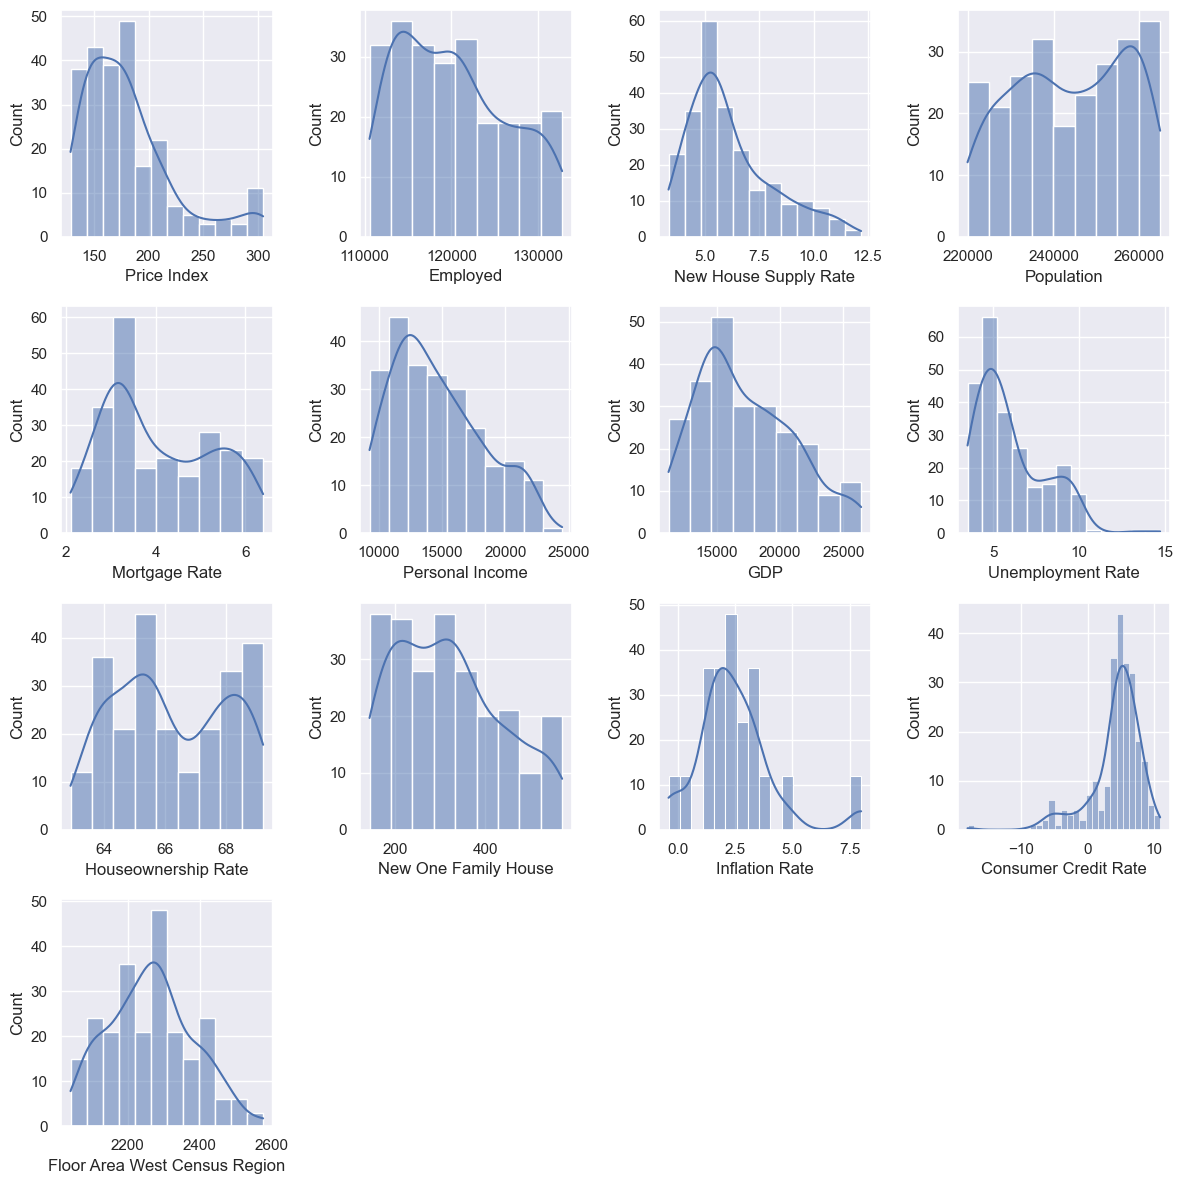

In [104]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()
for i in range(1, 14):
    sns.histplot(housing_data.iloc[:, i], kde=True, ax=axes[i - 1])
for i in range(13, len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

## Dealing with outliers

In [105]:
q=housing_data['Inflation Rate'].quantile(.95)
data_1=housing_data[housing_data['Inflation Rate']<q]

In [106]:
q=data_1['Unemployment Rate'].quantile(.99)
data_2=data_1[data_1['Unemployment Rate']<q]
data_cleaned=data_2.reset_index(drop=True)

## Checking OLS assumptions

### Linearity Check

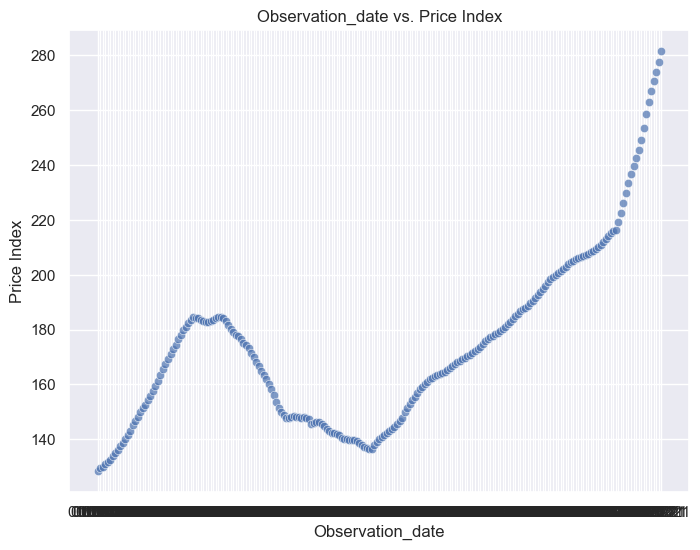

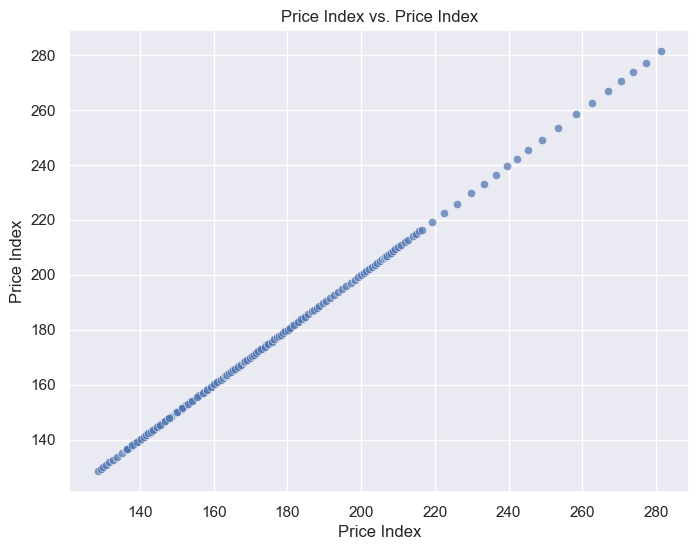

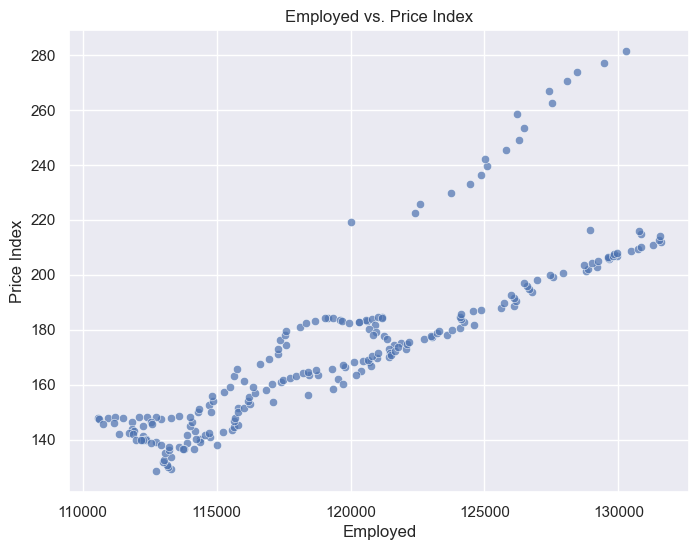

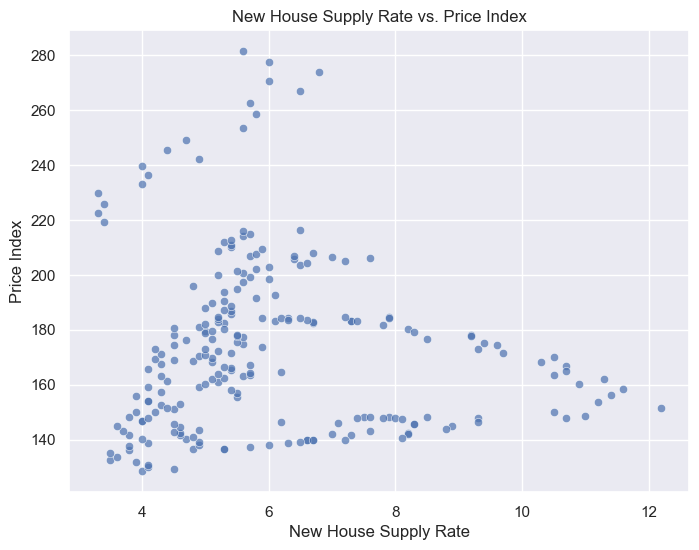

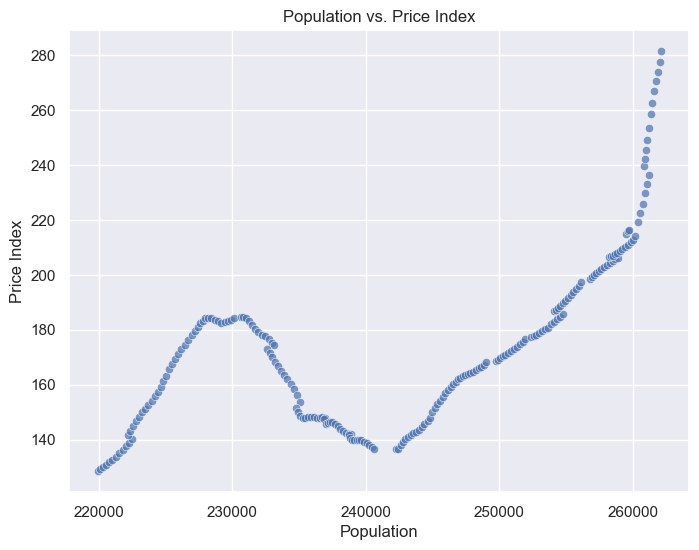

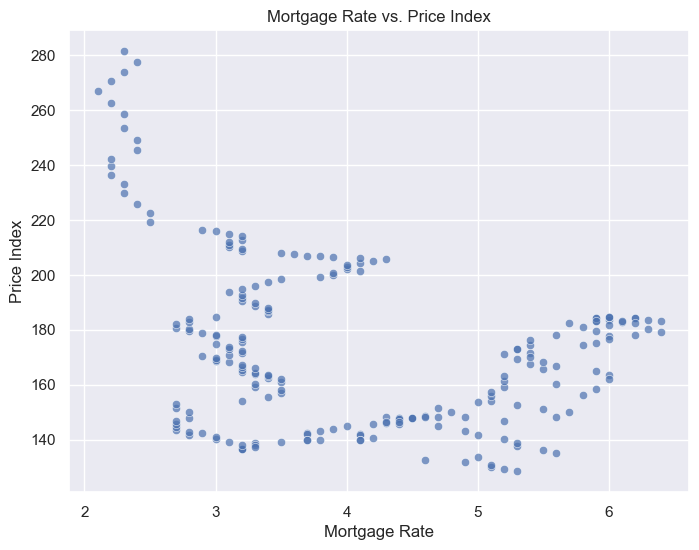

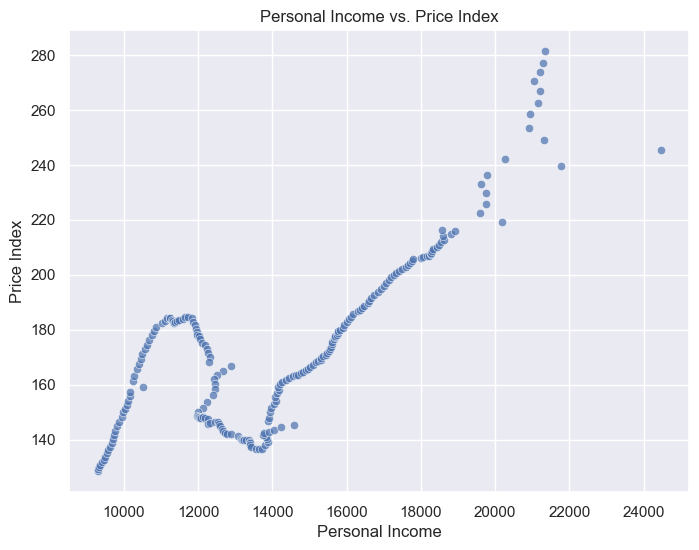

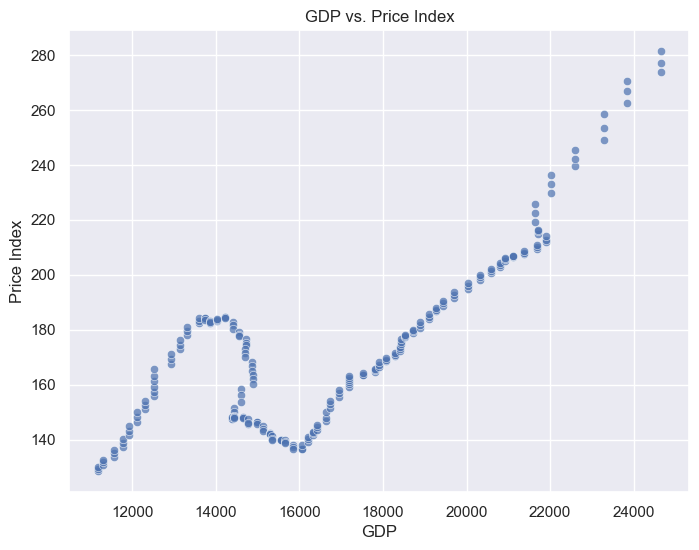

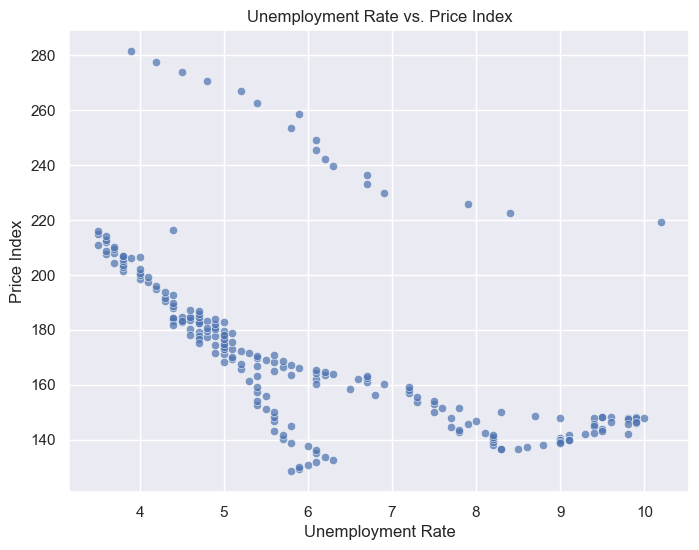

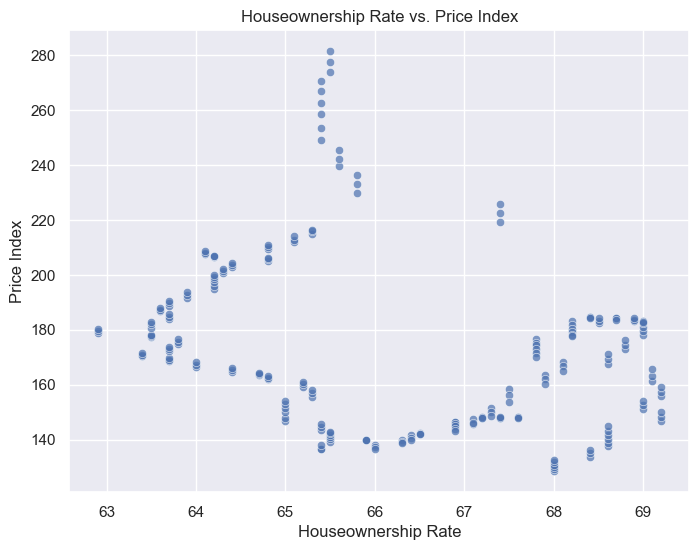

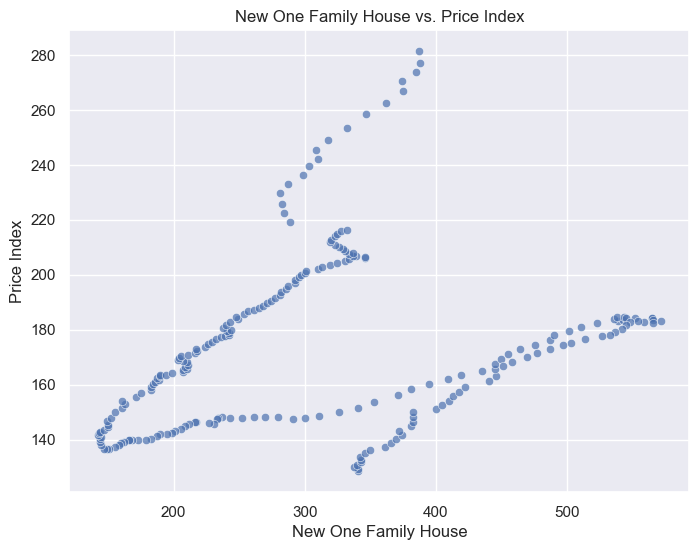

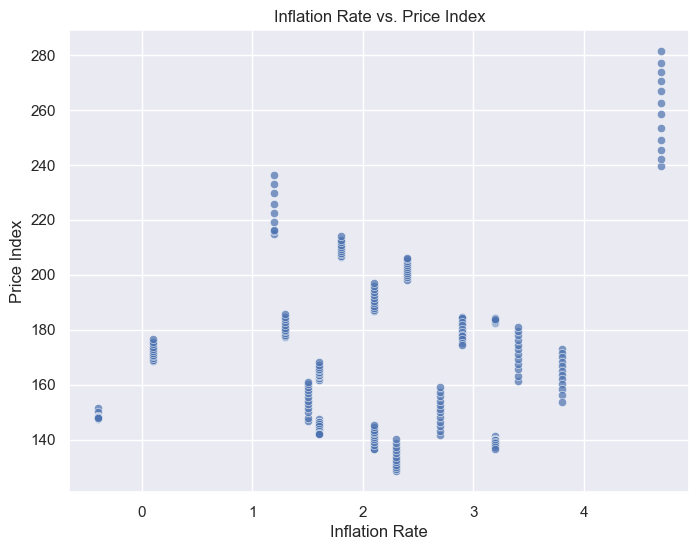

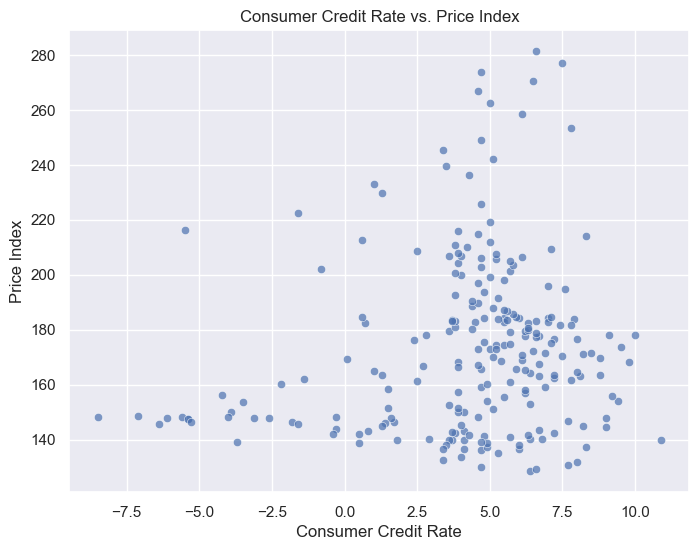

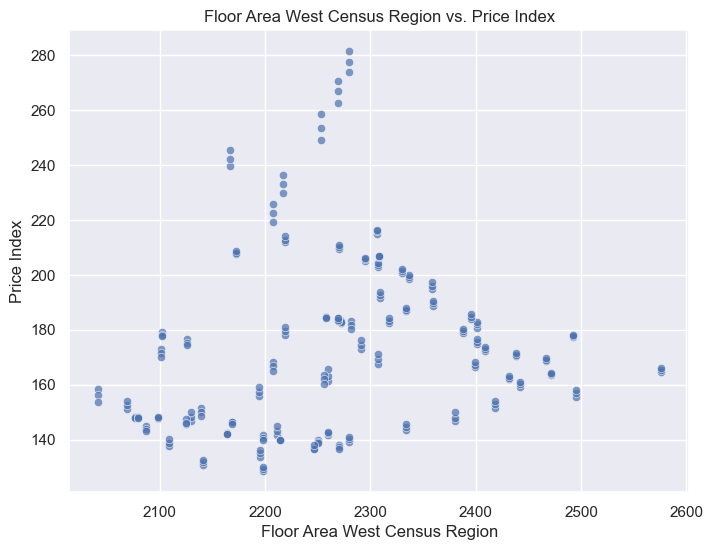

In [107]:
cols = data_cleaned.columns.values
for column in cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y="Price Index", data=data_cleaned, alpha=0.7)
    plt.title(f'{column} vs. Price Index')
    plt.xlabel(column)
    plt.ylabel('Price Index')
    plt.show()

## Relaxing the assumption( Log transformation on the price)
converted the Price Index values to log values, to deal with nonliniearity between independent and dependent variable.

In [108]:
log_price=np.log(data_cleaned["Price Index"])

In [109]:
data_cleaned["Log Price"]= log_price
data_cleaned.head()

,Observation_date,Price Index,Employed,New House Supply Rate,Population,Mortgage Rate,Personal Income,GDP,Unemployment Rate,Houseownership Rate,New One Family House,Inflation Rate,Consumer Credit Rate,Floor Area West Census Region,Log Price
0,01/01/03,128.5,112746,4.0,219897,5.3,9290.1,11174.1,5.8,68.0,341,2.3,6.4,2198,4.855929
1,01/02/03,129.4,113285,4.5,220114,5.2,9296.2,11174.1,5.9,68.0,341,2.3,6.6,2198,4.862908
2,01/03/03,130.1,113174,4.1,220317,5.1,9333.8,11174.1,5.9,68.0,338,2.3,4.7,2198,4.868303
3,01/04/03,130.9,113168,4.1,220540,5.1,9356.4,11312.8,6.0,68.0,340,2.3,7.7,2141,4.874434
4,01/05/03,131.7,112991,3.9,220768,4.9,9414.4,11312.8,6.1,68.0,343,2.3,8.0,2141,4.880527


In [110]:
data_cleaned=data_cleaned.drop(["Price Index","Observation_date",],axis=1)

## Checking multicollinearity ("high correlation between independent variables")
Checking the values of variance inflation factor

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
variables= data_cleaned[[ 'Employed', 'New House Supply Rate',
       'Population', 'Mortgage Rate', 'Personal Income', 'GDP',
       'Unemployment Rate', 'Houseownership Rate', 'New One Family House',
       'Inflation Rate', 'Consumer Credit Rate',
       'Floor Area West Census Region']]
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"]=variables.columns
vif

,VIF,features
0,50199.507657,Employed
1,36.765748,New House Supply Rate
2,61381.456291,Population
3,238.284678,Mortgage Rate
4,1724.605117,Personal Income
5,3706.060926,GDP
6,637.157623,Unemployment Rate
7,12549.817155,Houseownership Rate
8,163.611576,New One Family House
9,10.220803,Inflation Rate


<Axes: >

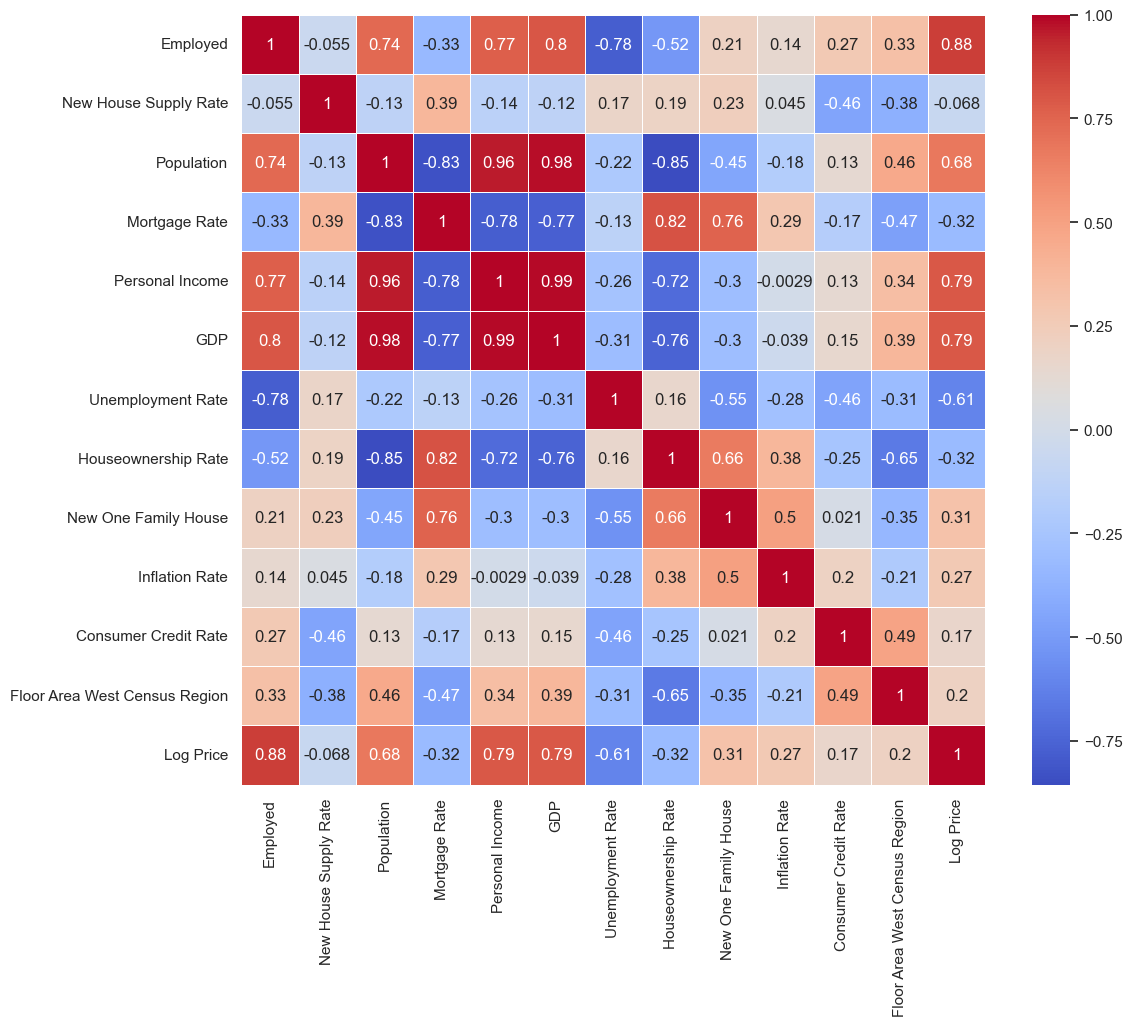

In [136]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_cleaned.corr(),annot=True,cmap='coolwarm', linewidths=.5)

# Linear Regression Model
Setting the target and input variables

In [113]:
target=data_cleaned['Log Price']
inputs= data_cleaned.drop(['Log Price'],axis=1)

## Standardization of the data

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler= StandardScaler()
scaler.fit(inputs)
input_scaled=scaler.transform(inputs)

## Train and Testing Split

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train,x_test, y_train,y_test=train_test_split(input_scaled,target,test_size=.2, random_state=42)

## Creating Regression model

In [141]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [142]:
y_predicted=reg.predict(x_train)

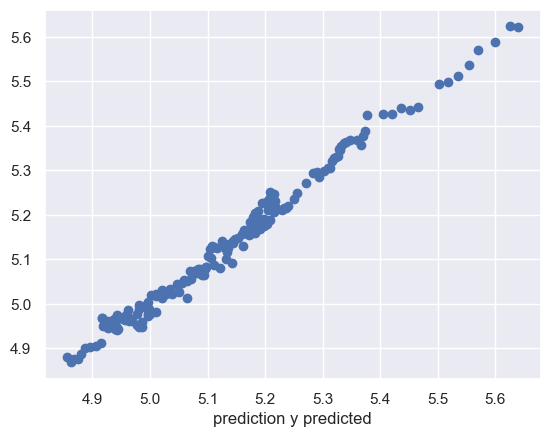

In [143]:
plt.scatter(y_train,y_predicted)
plt.xlabel('target y train')
plt.xlabel('prediction y predicted')
plt.show()

In [144]:
reg.score(x_train,y_train)

0.9881408274261253

## Finding Weights and Bias 

In [122]:
reg.coef_

array([-0.11645798, -0.00903629,  0.11510913, -0.02424871,  0.02146709,
        0.12005844, -0.04749344,  0.01453967,  0.1575179 ,  0.00035314,
       -0.00707689,  0.00410596])

In [123]:
reg.intercept_

5.1436705142263

## Feature selection with Weights

In [124]:
reg_summery=pd.DataFrame(inputs.columns.values,columns=["Features"])
reg_summery["Weights"]=reg.coef_
reg_summery

,Features,Weights
0,Employed,-0.116458
1,New House Supply Rate,-0.009036
2,Population,0.115109
3,Mortgage Rate,-0.024249
4,Personal Income,0.021467
5,GDP,0.120058
6,Unemployment Rate,-0.047493
7,Houseownership Rate,0.014540
8,New One Family House,0.157518
9,Inflation Rate,0.000353


### Features with negative impact: Employed, New House Supply Rate, Mortgage Rate, Unemployment Rate, Consumer Credit rate
### Features with positive impact: Population, Personal Income, GDP, Houseownership Rate, New One Family House, Inflatin Rate, Floor Area West Census Region

## Testing and prediction

In [125]:
y_test_predicted=reg.predict(x_test)

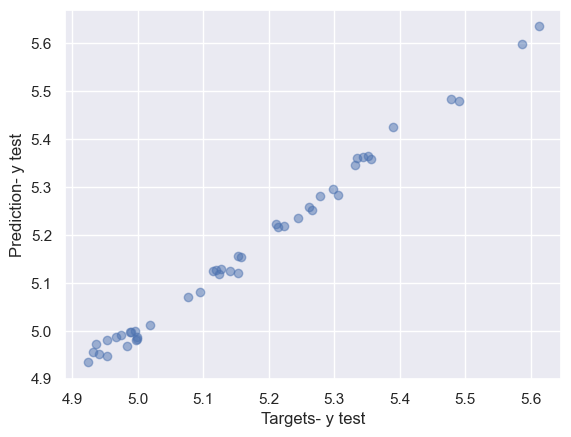

In [126]:
plt.scatter(y_test,y_test_predicted,alpha=0.5)
plt.xlabel("Targets- y test")
plt.ylabel("Prediction- y test") 
plt.show()

## Evaluating Model Perfomance on testing data

In [127]:
df_pf=pd.DataFrame(np.exp(y_test_predicted), columns=["Prediction"])
df_pf.head()

,Prediction
0,138.901894
1,197.023515
2,147.890323
3,226.910986
4,167.921121


In [128]:
y_test=y_test.reset_index(drop=True)

In [129]:
df_pf['Target']= np.exp(y_test)
df_pf.head()

,Prediction,Target
0,138.901894,137.5
1,197.023515,201.4
2,147.890323,146.8
3,226.910986,219.3
4,167.921121,170.9


In [130]:
df_pf["Residuals"]=df_pf["Target"]-df_pf["Prediction"]

In [131]:
df_pf['Difference%']=np.absolute(df_pf["Residuals"]/df_pf["Target"]*100)
df_pf.describe()

,Prediction,Target,Residuals,Difference%
count,45.000000,45.000000,45.000000,45.000000
mean,178.486965,177.980000,-0.506965,1.252898
std,35.419272,34.751518,2.778529,0.910124
min,138.901894,137.500000,-7.610986,0.101858
25%,147.143414,147.900000,-2.535861,0.585741
50%,168.279945,170.900000,-0.386027,1.019559
75%,197.023515,200.000000,1.232264,1.743054
max,279.920910,273.800000,5.591974,3.655592
